In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


# BlueJeanCo

Critiques:  Variables available (strength, extension) do not map perfectly to 'long-lasting.'  Strength is a closer match so it is uesd here.  

In [ ]:
data = pd.read_csv("http://www.stat.ufl.edu/~winner/data/bluejeans_laser.csv")
print(data.head())

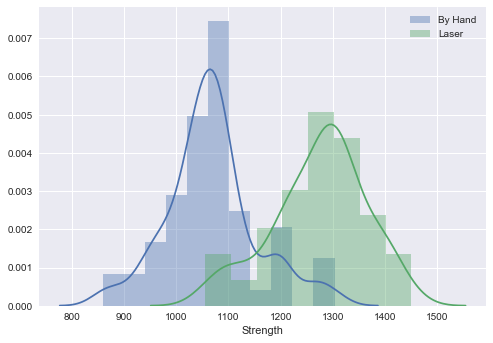

In [16]:
sns.distplot(data.loc[data['method']==1,'strength'],label='By Hand')
sns.distplot(data.loc[data['method']==2,'strength'],label='Laser')
plt.xlabel('Strength')
plt.legend()
plt.show()

In [5]:
print(stats.ttest_ind(data.loc[data['method']==1,'strength'],data.loc[data['method']==2,'strength']))

Ttest_indResult(statistic=-12.802569035117875, pvalue=4.6256174496679141e-24)


It appears that the laser jeans are statistically significantly stronger than the ones done by hand (p < .001, very unlikely that the difference is due to chance), and are thus likely to last longer.  The data scientist should recommend that, if strength is a priority, the company switch to using the laser.

# SoftHairInc

The trick here is that the dependent variable is change in ease-of-shampooing from before use to after use, so the student will need to create a difference score.  Alternatively, they could test whether ease-of-shampooing was similar across groups before shampoo use.  If it was, they could make the case that they could use the post-shampooing score only.

In [21]:
hair = pd.read_csv('http://www.stat.ufl.edu/~winner/data/combhair.dat', 
                   sep='\s+', 
                   header=0, 
                   skiprows=1,
                   names=["shampoo","treatment","swatch","run","combability"])
print(hair.head())

   shampoo  treatment  swatch  run  combability
0        1          0       1    3          160
1        1          0       1    4          193
2        1          0       1    5          173
3        1          1       1    1          183
4        1          1       1    2          133


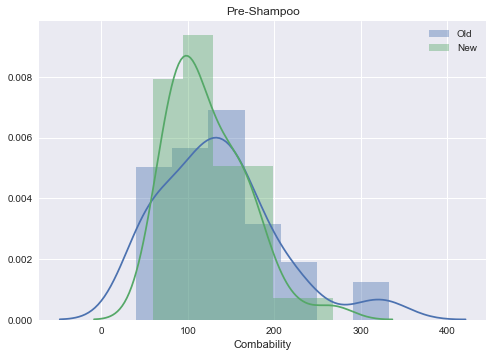

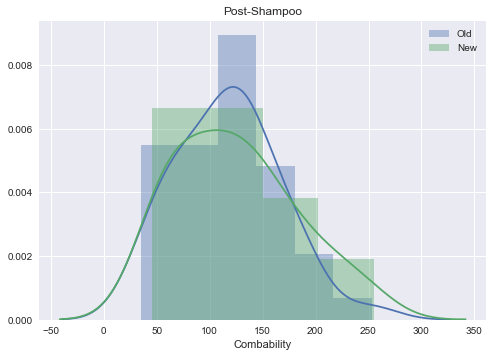

In [45]:
sns.distplot(hair.loc[(hair['shampoo']==1) & (hair['treatment']==0),'combability'],label='Old')
sns.distplot(hair.loc[(hair['shampoo']==2) & (hair['treatment']==0),'combability'],label='New')
plt.xlabel('Combability')
plt.title('Pre-Shampoo')
plt.legend()
plt.show()

sns.distplot(hair.loc[(hair['shampoo']==1) & (hair['treatment']==1),'combability'],label='Old')
sns.distplot(hair.loc[(hair['shampoo']==2) & (hair['treatment']==1),'combability'],label='New')
plt.xlabel('Combability')
plt.title('Post-Shampoo')
plt.legend()
plt.show()

In [38]:
#Computing a combability change-score

hair_wide=pd.merge(hair.loc[hair['treatment']==0,:],hair.loc[hair['treatment']==1,:],on=['swatch','run','shampoo'],
                  suffixes=['_pre','_post'])

hair_wide['combability_change']=hair_wide['combability_post']-hair_wide['combability_pre']
print(hair_wide.head())

   shampoo  treatment_pre  swatch  run  combability_pre  treatment_post  \
0        1              0       1    3              160               1   
1        1              0       1    4              193               1   
2        1              0       1    5              173               1   
3        1              0       2    1              228               1   
4        1              0       2    2              333               1   

   combability_post  combability_change  
0               190                  30  
1               153                 -40  
2               173                   0  
3               173                 -55  
4               173                -160  


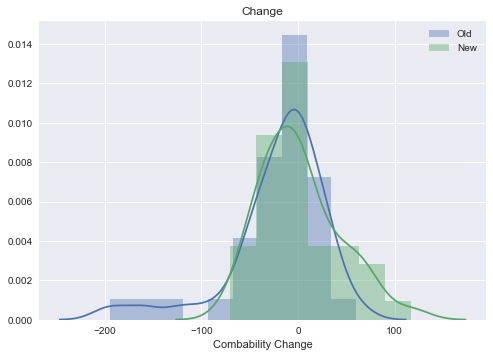

In [44]:
sns.distplot(hair_wide.loc[hair_wide['shampoo']==1,'combability_change'],label='Old')
sns.distplot(hair_wide.loc[hair_wide['shampoo']==2,'combability_change'],label='New')
plt.xlabel('Combability Change')
plt.title('Change')
plt.legend()
plt.show()

In [40]:
print(stats.ttest_ind(hair_wide.loc[hair_wide['shampoo']==1,'combability_change'],
                      hair_wide.loc[hair_wide['shampoo']==2,'combability_change']))

Ttest_indResult(statistic=-2.0951302873162447, pvalue=0.039490695522569196)


# SoftHairInc Conclusion

While the statistical test suggests that there is a meaningful difference, visual inspection of the change scores shows that this difference is due largely to a set of outliers in the 'Old' shampoo group.  The data scientist should recommend collecting more data before coming to a conclusion, to see whether the outliers reflect a real trend.